<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning & Deep Learning</b></center>

<center><b><h1>Lab - 5</b></center>    
<pre>    

# SVR

# Importing the libraries

In [1]:
import pandas as pd

# Read World bank CSV

In [2]:
df = pd.read_csv('WorldBank.csv')   

In [3]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,IND,Export value index (2000 = 100),TX.VAL.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,714.748450,700.408454,742.928128,761.441742,632.269428,624.224980,706.102795,766.360840,NaN,NaN
1,India,IND,Insurance and financial services (% of commerc...,TX.VAL.INSF.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,6.403614,5.246771,5.729495,5.060904,4.706801,4.471147,3.760466,3.921611,3.438072,NaN
2,India,IND,"Merchandise imports by the reporting economy, ...",TM.VAL.MRCH.RS.ZS,4.983551,6.48805,10.124611,9.451370,10.529480,10.891125,...,0.755066,0.273842,0.440954,1.514439,2.228351,2.270593,1.770314,0.535419,NaN,NaN
3,India,IND,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,NaN,NaN,17.080013,15.197912,16.863038,22.008132,...,3.741041,4.048246,3.895215,4.458509,5.758038,6.505293,6.137617,4.156488,4.248261,NaN
4,India,IND,Share of tariff lines with international peaks...,TM.TAX.MRCH.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.434346,8.641136,8.576307,NaN,5.802677,7.707811,8.288774,9.111423,NaN,NaN


# Perform conditional selection to find - Population ages 15-64 (% of total population)

In [4]:
data = df[df['Indicator Name']=='Population ages 15-64 (% of total population)']

# Divide the data into input and output

In [5]:
x = [i for i in range(1960, 2020)]
y = data.iloc[:,4:-1].values.astype('float').reshape(-1, 1)

In [6]:
x

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [7]:
y

array([[56.49748004],
       [56.17753236],
       [55.80745463],
       [55.46166361],
       [55.24893881],
       [55.21135053],
       [55.09090078],
       [55.15534672],
       [55.34507283],
       [55.57014408],
       [55.78194745],
       [55.85676846],
       [55.95268174],
       [56.07247186],
       [56.23447551],
       [56.44405309],
       [56.49722595],
       [56.62068516],
       [56.78900152],
       [56.9691436 ],
       [57.1425581 ],
       [57.18105454],
       [57.22630775],
       [57.28875038],
       [57.39054366],
       [57.54142108],
       [57.55350984],
       [57.6545119 ],
       [57.81875323],
       [58.01501187],
       [58.22990246],
       [58.37403848],
       [58.5472698 ],
       [58.75605047],
       [59.012126  ],
       [59.31657719],
       [59.56507329],
       [59.8572303 ],
       [60.18600058],
       [60.53971518],
       [60.90862046],
       [61.18898716],
       [61.4993847 ],
       [61.83084479],
       [62.173897  ],
       [62

# Plot scatter plot of Population ages 15-64 (% of total population)

In [8]:
import matplotlib.pylab as plt

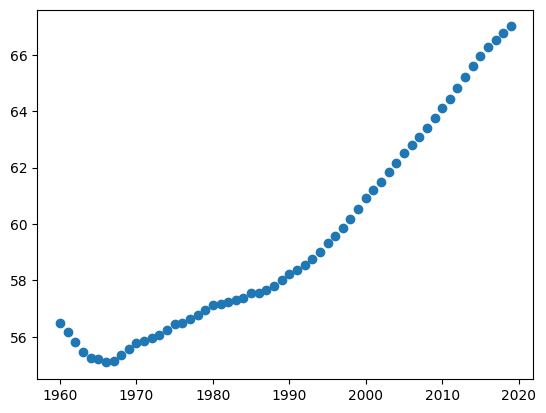

In [9]:
plt.scatter(x,y)
plt.show()

# Feature Scaling (Mandatory for SVR)**
SVR is highly sensitive to the range of data points. If we don't scale (normalize) the data, the model will fail to find the correct hyperplane.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x_scaled = sc_x.fit_transform([[i] for i in x])
y_scaled = sc_y.fit_transform(y)

# Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Fitting SVR on 3 Different Kernel on dataset

In [14]:
from sklearn.svm import SVR

In [15]:
model_rbf = SVR()

In [16]:
model_rbf.fit(x_scaled, y_scaled)

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [17]:
y_pred_scaled = model_rbf.predict(x_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

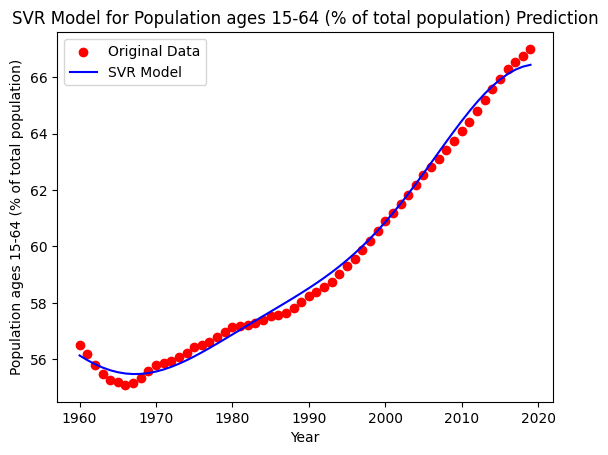

In [18]:
plt.scatter(x, y, color='red', label='Original Data')
plt.plot(x, y_pred, color='blue', label='SVR Model')
plt.xlabel('Year')
plt.ylabel('Population ages 15-64 (% of total population)')
plt.title('SVR Model for Population ages 15-64 (% of total population) Prediction')
plt.legend()
plt.show()

# Predict the x_test using 3 Kernel

In [19]:
model_rbf.score(x_scaled,y_scaled)

0.9950752412560967

# Visualising the  results

### **Student Activity : Prediction**
**Task:** Predict the value for the Year **2025** (or value 6.5 in the demo data). 
Remember: You must transform the input before predicting, and inverse transform the output.